In [2]:
### used to test the llp_merged data
### check all branches have the same value for events that are in both MET skim and EGamma

import ROOT as rt
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import pandas as pd
from scipy.stats import norm

import scipy
import awkward
import numpy as np
import time
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
from helper_functions import deltaPhi
import CMS_lumi, tdrstyle
a = tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0


print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [97]:
fpath =OrderedDict()
tree = OrderedDict()

data_year = 'full'
lumi = {'MC_Summer16':35.9*1000,
        'MC_Fall17': 41.5*1000, 
        'MC_Fall18':  59.7*1000 ,
       
       }


path = '/storage/af/group/phys_exotica/delayedjets/HNL/skim/'


fpath['1lep'] = '/storage/af/user/christiw/login-1/christiw/LLP/HNL/CMSSW_9_4_4/src/llp_analyzer/HeavyNeutralLepton_Tree.root'
fpath['met'] = '/storage/af/user/christiw/login-1/christiw/LLP/displacedJetMuonAnalyzer/csc/V1p17/Data2018/v5/v135/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Data2017_Data2018-HighMET_goodLumi.root'
fpath['1lep'] = '/storage/af/user/cpena/work/HNL_Ntupler/CMSSW_9_4_20/src/Heavy_neutrino_search/NtupleMerger/Merger/output/job_160_Sep09v0/merged_AOD160.root'
fpath['met'] = '/storage/cms/store/group/phys_exotica/delayedjets/displacedJetMuonNtuple/V1p17/Data2018/v5/sixie/MET/'+\
    'Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_Run2018B-HighMET-17Sep2018-v1_v5_v1/200513_161816/0000/displacedJetMuon_ntupler_192.root'

NEvents = {}
Total = {}
accep = {}
accep_met = {}
for k,v in fpath.items():
    root_dir = uproot.open(v) 
    if 'met' in k: tree[k] = root_dir['ntuples']['llp']
    else:tree[k] = root_dir['llp_merged']
    
#     NEvents[k] = root_dir['NEvents'][1]
#     a = tree[k]["weight"].array()
    
#     print(k[17:],'\t', a[0]*137000,)


In [25]:
# events in both SingleElectron and MET skim in 2018B
events = np.array([1756590546, 1760088511, 1760239932, 1837977836])


In [ ]:
for i in range(1,996):
    if i%10 == 0:print('processed ' + str(i) + ' events')
    fpath = '/storage/cms/store/group/phys_exotica/delayedjets/displacedJetMuonNtuple/V1p17/Data2018/v5/sixie/MET/'+\
    'Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_Run2018B-HighMET-17Sep2018-v1_v5_v1/200513_161816/0000/displacedJetMuon_ntupler_'+str(i)+'.root'
    tree = uproot.open(fpath)['ntuples']['llp']
    
    test = tree['eventNum'].array()
    if 1756590546  in tree['eventNum'].array():print(i)
    if 1760088511  in tree['eventNum'].array():print(i)
    if 1760239932  in tree['eventNum'].array():print(i)
    if 1837977836  in tree['eventNum'].array():print(i)


In [147]:
branches = {}
evtnum = 1760239932
i = 0
for k, T in tree.items():
    for key in T.keys():
#         if b'gLLP' in key:continue
#         if b'HLT' in key:continue
#         if b'higgsPtWeight' in key:continue
#         if b'gHiggsPt' in key:continue
#         if b'nGenParticle' in key or b'nGenJets' in key:continue
#         if b'gParticle' in key or b'genJet' in key:continue
#         if b'nRpc' in key:continue

        if i == 0:
            branches[str(key)] =  [T.array(key)[T.array('eventNum') == evtnum]]
        else:
            
            if str(key) not in branches.keys():continue
            branches[str(key)].append(T.array(key)[T.array('eventNum') == evtnum])
            
    i+=1

In [149]:
for k, v in branches.items():
    if not len(v) == 2:
        print(k,v, 'length not 2')
        continue
    if 'HLTPrescale' in k:continue
    if 'lheComments' in k:continue
    
#     if not 'gen_time' in k:continue
    print(k, v)
    if not (v[0].any()==v[1].any()).any(): #print branches if not the same
        print(k, v, (v[0].any()==v[1].any()).any())

b'isData' [array([ True]), array([ True])]
b'nPV' [array([20], dtype=int32), array([20], dtype=int32)]
b'runNum' [array([317182], dtype=uint32), array([317182], dtype=uint32)]
b'nSlimmedSecondV' [array([9], dtype=uint32), array([9], dtype=uint32)]
b'lumiNum' [array([1238], dtype=uint32), array([1238], dtype=uint32)]
b'eventNum' [array([1760239932], dtype=uint32), array([1760239932], dtype=uint32)]
b'eventTime' [array([1527699530], dtype=uint32), array([1527699530], dtype=uint32)]
b'pvX' [array([0.09695882], dtype=float32), array([0.09695882], dtype=float32)]
b'pvY' [array([-0.06357349], dtype=float32), array([-0.06357349], dtype=float32)]
b'pvZ' [array([-6.0265965], dtype=float32), array([-6.0265965], dtype=float32)]
b'fixedGridRhoAll' [array([-999.], dtype=float32), array([-999.], dtype=float32)]
b'fixedGridRhoFastjetAll' [array([16.313015], dtype=float32), array([16.313015], dtype=float32)]
b'fixedGridRhoFastjetAllCalo' [array([-999.], dtype=float32), array([-999.], dtype=float32)]
b

In [ ]:
b'ele_passHLTFilter' [<JaggedArray [[]] at 0x7efe6de3f358>, <JaggedArray [[]] at 0x7efe6df9a438>] [False]
b'nCscWireDigis' [array([0], dtype=int32), array([112], dtype=int32)] False
b'nCscStripDigis' [array([0], dtype=int32), array([295], dtype=int32)] False
b'nCscRechitClusters' [array([0], dtype=int32), array([1], dtype=int32)] False
b'cscRechitCluster_match_cscSegCluster_minDeltaR' [<JaggedArray [[]] at 0x7efe6de3fac8>, <JaggedArray [[999.0]] at 0x7efe6d69c6d8>] False
b'cscRechitCluster_match_cscSegCluster_index' [<JaggedArray [[]] at 0x7efe6dbfe2e8>, <JaggedArray [[999]] at 0x7efe6d69ce10>] False
b'cscRechitCluster_match_gParticle_minDeltaR' [<JaggedArray [[]] at 0x7efe6de3fcf8>, <JaggedArray [[999.0]] at 0x7efe6d69c7f0>] False
b'cscRechitCluster_match_gParticle_index' [<JaggedArray [[]] at 0x7efe6dbfedd8>, <JaggedArray [[999]] at 0x7efe6dfca860>] False
b'cscRechitCluster_match_gParticle_id' [<JaggedArray [[]] at 0x7efe6de3fc18>, <JaggedArray [[999]] at 0x7efe6dc108d0>] False
b'cscRechitClusterX' [<JaggedArray [[]] at 0x7efe6dbfe828>, <JaggedArray [[-31.329123]] at 0x7efe6dfca0b8>] False
b'cscRechitClusterY' [<JaggedArray [[]] at 0x7efe6de3f160>, <JaggedArray [[170.27599]] at 0x7efe6d69c6a0>] False
b'cscRechitClusterZ' [<JaggedArray [[]] at 0x7efe6dbfea90>, <JaggedArray [[614.78406]] at 0x7efe6d69cc50>] False
b'cscRechitClusterTime' [<JaggedArray [[]] at 0x7efe6de3fc50>, <JaggedArray [[2.716084]] at 0x7efe6d69c390>] False
b'cscRechitClusterTimeTotal' [<JaggedArray [[]] at 0x7efe6e096128>, <JaggedArray [[-0.121788286]] at 0x7efe6dd67c88>] False
b'cscRechitClusterTimeSpread' [<JaggedArray [[]] at 0x7efe6e096e48>, <JaggedArray [[6.211884]] at 0x7efe6df3b9b0>] False
b'cscRechitClusterMajorAxis' [<JaggedArray [[]] at 0x7efe6e096ba8>, <JaggedArray [[0.037934337]] at 0x7efe6df3ba20>] False
b'cscRechitClusterMinorAxis' [<JaggedArray [[]] at 0x7efe6dbfe940>, <JaggedArray [[0.02315087]] at 0x7efe6df3bc18>] False
b'cscRechitClusterEtaPhiSpread' [<JaggedArray [[]] at 0x7efe6e096b70>, <JaggedArray [[0.019042568]] at 0x7efe6df3b1d0>] False
b'cscRechitClusterPhiSpread' [<JaggedArray [[]] at 0x7efe6dbfe9b0>, <JaggedArray [[0.026803887]] at 0x7efe6dd67978>] False
b'cscRechitClusterEtaSpread' [<JaggedArray [[]] at 0x7efe6e096d30>, <JaggedArray [[0.03544754]] at 0x7efe6d69cc18>] False
b'cscRechitClusterXSpread' [<JaggedArray [[]] at 0x7efe6dbfee80>, <JaggedArray [[5.112852]] at 0x7efe6d69cf60>] False
b'cscRechitClusterXYSpread' [<JaggedArray [[]] at 0x7efe6e096c18>, <JaggedArray [[3.7481635]] at 0x7efe6dc104e0>] False
b'cscRechitClusterRSpread' [<JaggedArray [[]] at 0x7efe6e002780>, <JaggedArray [[6.372132]] at 0x7efe6dfca6a0>] False
b'cscRechitClusterYSpread' [<JaggedArray [[]] at 0x7efe6e002470>, <JaggedArray [[5.9956613]] at 0x7efe6dc10198>] False
b'cscRechitClusterZSpread' [<JaggedArray [[]] at 0x7efe6e0027b8>, <JaggedArray [[0.0024626888]] at 0x7efe6dfcac50>] False
b'cscRechitClusterPhi' [<JaggedArray [[]] at 0x7efe6dbfe4a8>, <JaggedArray [[1.7527516]] at 0x7efe6d69c518>] False
b'cscRechitClusterEta' [<JaggedArray [[]] at 0x7efe6e002400>, <JaggedArray [[1.9796139]] at 0x7efe6d69c978>] False
b'cscRechitClusterJetVetoPt' [<JaggedArray [[]] at 0x7efe6dbfe588>, <JaggedArray [[191.65573]] at 0x7efe6d69c3c8>] False
b'cscRechitClusterJetVetoE' [<JaggedArray [[]] at 0x7efe6e002390>, <JaggedArray [[691.63654]] at 0x7efe6dd67588>] False
b'cscRechitClusterMuonVetoPt' [<JaggedArray [[]] at 0x7efe6e0c2748>, <JaggedArray [[27.091581]] at 0x7efe6df3b400>] False
b'cscRechitClusterMuonVetoE' [<JaggedArray [[]] at 0x7efe6e0026d8>, <JaggedArray [[97.66618]] at 0x7efe6df3bba8>] False
b'cscRechitClusterSize' [<JaggedArray [[]] at 0x7efe6de374e0>, <JaggedArray [[59]] at 0x7efe6df3b7b8>] False
b'cscRechitClusterNRechitChamberPlus11' [<JaggedArray [[]] at 0x7efe6de377b8>, <JaggedArray [[59]] at 0x7efe6df3b390>] False
b'cscRechitClusterMe11Ratio' [<JaggedArray [[]] at 0x7efe6e07c898>, <JaggedArray [[1.0]] at 0x7efe6dd67940>] False
b'cscRechitClusterNStation' [<JaggedArray [[]] at 0x7efe6e07c128>, <JaggedArray [[1]] at 0x7efe6d69ca20>] False
b'cscRechitClusterMaxStation' [<JaggedArray [[]] at 0x7efe6e004780>, <JaggedArray [[1]] at 0x7efe6dfca390>] False
b'cscRechitClusterMaxStationRatio' [<JaggedArray [[]] at 0x7efe6e07c400>, <JaggedArray [[1.0]] at 0x7efe6dfca2e8>] False
b'cscRechitClusterNChamber' [<JaggedArray [[]] at 0x7efe6e002198>, <JaggedArray [[1]] at 0x7efe6de59550>] False
b'cscRechitClusterMaxChamber' [<JaggedArray [[]] at 0x7efe6fba1978>, <JaggedArray [[11]] at 0x7efe6dc31898>] False
b'cscRechitClusterMaxChamberRatio' [<JaggedArray [[]] at 0x7efe6fba1ef0>, <JaggedArray [[1.0]] at 0x7efe6d964f28>] False
b'gen_time' [array([[-666., -666., -666., -666.]], dtype=float32)] length not 2
b'gen_time_pv' [array([[-666., -666., -666., -666.]], dtype=float32)] length not 2
b'photon_travel_time' [array([[-666., -666., -666., -666.]], dtype=float32)] length not 2
b'photon_travel_time_pv' [array([[-666., -666., -666., -666.]], dtype=float32)] length not 2
b'gLLP_daughter_travel_time' [array([[-666., -666., -666., -666.]], dtype=float32)] length not 2
b'gen_time_dau' [array([[-666., -666., -666., -666.]], dtype=float32)] length not 2
b'gen_time_dau_pv' [array([[-666., -666., -666., -666.]], dtype=float32)] length not 2
b'photon_travel_time_dau' [array([[-666., -666., -666., -666.]], dtype=float32)] length not 2
b'photon_travel_time_dau_pv' [array([[-666., -666., -666., -666.]], dtype=float32)] length not 2
b'gLLP_grandaughter_travel_time' [array([[-666., -666., -666., -666.]], dtype=float32)] length not 2

In [122]:
for k, v in branches.items():
    if 'cscRechitClusterX' in k:
        print(k,v)
        print(v[0][0].all() == v[1][0].all())
        print(v[0][0] == v[1][0])

b'cscRechitClusterX' [<JaggedArray [[]] at 0x7efe6dbfe828>, <JaggedArray [[-31.329123]] at 0x7efe6dfca0b8>]
True
[]
b'cscRechitClusterXSpread' [<JaggedArray [[]] at 0x7efe6dbfee80>, <JaggedArray [[5.112852]] at 0x7efe6d69cf60>]
True
[]
b'cscRechitClusterXYSpread' [<JaggedArray [[]] at 0x7efe6e096c18>, <JaggedArray [[3.7481635]] at 0x7efe6dc104e0>]
True
[]


# load variables

In [507]:

sel_ev = {}
metPhi = {}
dphiMetXYCorr_cluster = {}
evtNum = {}

met = {}
lepPt = {}
lepEta = {}
lepPhi = {}
nLeptons = {}
nClusters = {}

dtRechitCluster_match_RPCBx_dPhi0p5_mode = {}
dtRechitClusterPhi = {}
dtRechitClusterNStation10 = {}
dtRechitClusterEta = {}
dtRechitClusterPhi = {}
dtRechitClusterAvgStation10 = {}
dtRechitClusterMaxStation = {}
dphiMet_cluster = {}
dtRechitCluster_match_RPCBx_dR0p4_mode = {}
dtClusterSize = {}
dtRechitClusterMuonVetoPt = {}
dtRechitClusterJetVetoPt = {}
dphiLep_cluster = {}
dtRechitCluster_match_RPCBx_dPhi0p5 = {}
dtRechitCluster_match_RB1_0p4 = {}
dtRechitCluster_match_MB1hits_0p5 = {}
dtRechitCluster_match_RPChits_dPhi0p5 = {}
dtRechitCluster_match_RB1_dPhi0p5 = {}
weight = {}
weight_evt = {}
gWPt = {}
gLLP_pt = {}
gLLP_eta = {}
gLLP_e = {}
gLepPt = {}
gLepEta = {}

gLLP_dt = {}
weight_all = {}
gLLP_lepdPhi = {}
dtRechitClusterGenMuonVetoPt = {}
dtRechitCluster_match_gParticle_Id = {}
dtRechitClusterGenMuonVetoPt = {}
dtRechitCluster_match_gParticle_deltaR = {}

dphiLep_llp = {}
for k, T in tree.items():

        
########### SELECTION: CLUSTERS ############

    sel_rechitcluster = T.array('dtRechitClusterMuonVetoPt') < 10000000

    if 'HNL' in k:sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('dtRechitCluster_match_gLLP_dt'))
    if 'data' in k:sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('dtRechitClusterSize')<100)

########### = SELECTION: LEPTON ############
    
    sel_ele = np.logical_and(T.array('lepPt') > 35, np.abs(T.array('lepEta'))<2.4)
    sel_ele = np.logical_and(sel_ele, np.abs(T.array('lepPdgId')) == 11)
    sel_ele = np.logical_and(sel_ele, np.abs(T.array('lepPassId')) == 1)
########### SELECTION: EVENTS ############
    # select only triggered events
    sel_ev[k] = T.array('SingleEleTrigger')
    sel_ev[k] = np.logical_and(sel_ev[k] ,sel_ele.sum()==1)
    sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('metEENoise')>=30)
    
#     sel_ev[k]  = np.logical_and(sel_ev[k],sel_rechitcluster.sum() >= 1)
    
#     sel_ev[k] = np.logical_and(sel_ev[k],T.array('nDtStations25')<3)
#     sel_ev[k] = np.logical_and(sel_ev[k],T.array('nDtWheels25')<3)
#     sel_ev[k] = np.logical_and(sel_ev[k],np.abs(T.array('jetMet_dPhiMin'))>0.6)
    if 'HNL' in k: sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('gLLP_dt')[:,0])
    

########### BRANCHES ############
   ##### event variables ##### 

    ####### gen-level LLP variables #######
    gWPt[k] = T.array('gWPt')


    if 'HNL' in k:
        gLLP_pt[k] = T.array('gLLP_pt')[:,0]
        gLLP_eta[k] = T.array('gLLP_eta')[:,0]
        gLLP_e[k] = T.array('gLLP_e')[:,0]
        gLepPt[k] = T.array('gLepPt')
        gLepEta[k]= T.array('gLepEta')

        gLLP_dt[k]= T.array('gLLP_dt')[:,0]

        gLLP_lepdPhi[k] = T.array('gLLP_lepdPhi')[:,0]
        weight_all[k] = T.array('weight')*T.array('pileupWeight')
        
        weight_all[k] *= target.values[np.argmax(target.edges>gWPt[k][:,None],axis=1)-1]/11178549.542718 # integral
        weight_all[k] /= source.values[np.argmax(source.edges>gWPt[k][:,None],axis=1)-1]
        weight_all[k] = weight_all[k]
   
    #without cluster requirement
    met[k] = T.array('metEENoise')[sel_ev[k]]
    lepPt[k] = T.array('lepPt')[sel_ele][sel_ev[k]][:,0]
    lepEta[k] = T.array('lepEta')[sel_ele][sel_ev[k]][:,0]
    lepPhi[k] = T.array('lepPhi')[sel_ele][sel_ev[k]][:,0]
    nLeptons[k] = sel_ele.sum()[sel_ev[k]]
    nClusters[k] = sel_rechitcluster.sum()[sel_ev[k]]
    if 'data' in k:
        weight_evt[k] = np.ones(nClusters[k].shape)
    else:
        weight_evt[k] = T.array('weight')*T.array('pileupWeight')
        
        weight_evt[k] *= target.values[np.argmax(target.edges>gWPt[k][:,None],axis=1)-1]/11178549.542718 # integral
        weight_evt[k] /= source.values[np.argmax(source.edges>gWPt[k][:,None],axis=1)-1]
#         print(k, '\t',np.sum(weight_evt[k][np.logical_and(np.sum(T.array('gLLP_dt'),axis = 1) >= 1, T.array('metEENoise')>200)])/np.sum(weight_evt[k][np.sum(T.array('gLLP_dt'),axis = 1) >= 1]))
        weight_evt[k] = weight_evt[k][sel_ev[k]]
    # add cluster requirement
    sel_ev[k]  = np.logical_and(sel_ev[k],sel_rechitcluster.sum() >= 1)
    dtRechitClusterNStation10[k] = T.array('dtRechitClusterNStation10')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    dtRechitClusterEta[k] = T.array('dtRechitClusterEta')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    dtRechitClusterPhi[k] = T.array('dtRechitClusterPhi')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    dtRechitClusterAvgStation10[k] = T.array('dtRechitClusterAvgStation10')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    dtRechitClusterMaxStation[k] = T.array('dtRechitClusterMaxStation')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    dphiMet_cluster[k] = T.array('dtRechitClusterMetEENoise_dPhi')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    dtClusterSize[k] =  T.array('dtRechitClusterSize')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    
    
    dtRechitClusterMuonVetoPt[k] = T.array('dtRechitClusterMuonVetoPt')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    dtRechitClusterJetVetoPt[k] = T.array('dtRechitClusterJetVetoPt')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    dphiLep_cluster[k] = deltaPhi(T.array('lepPhi')[sel_ele][sel_ev[k]][:,0], dtRechitClusterPhi[k])

    dphiLep_llp[k] = deltaPhi(T.array('lepPhi')[sel_ele][sel_ev[k]][:,0], T.array('dtRechitCluster_match_gLLP_phi')[sel_rechitcluster][sel_ev[k]][:,0].flatten())

    
    dtRechitCluster_match_RPCBx_dPhi0p5[k] =  T.array('dtRechitCluster_match_RPCBx_dPhi0p5')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    dtRechitCluster_match_RB1_0p4[k] =  T.array('dtRechitCluster_match_RB1_0p4')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    dtRechitCluster_match_MB1hits_0p5[k] =  T.array('dtRechitCluster_match_MB1hits_0p5')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    dtRechitCluster_match_RPChits_dPhi0p5[k] =  T.array('dtRechitCluster_match_RPChits_dPhi0p5')[sel_rechitcluster][sel_ev[k]][:,0].flatten()

    dtRechitCluster_match_RB1_dPhi0p5[k] =  T.array('dtRechitCluster_match_RB1_dPhi0p5')[sel_rechitcluster][sel_ev[k]][:,0].flatten()

    dtRechitClusterGenMuonVetoPt[k] = T.array('dtRechitCluster_match_gParticle_Pt')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    dtRechitCluster_match_gParticle_Id[k] = T.array('dtRechitCluster_match_gParticle_Id')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    dtRechitClusterGenMuonVetoPt[k][np.logical_not(np.abs(dtRechitCluster_match_gParticle_Id[k])==13)] = 0
    dtRechitCluster_match_gParticle_deltaR[k] = T.array('dtRechitCluster_match_gParticle_deltaR')[sel_rechitcluster][sel_ev[k]][:,0].flatten()


    if 'data' in k:
        
        weight[k] = np.ones(dtRechitCluster_match_RPCBx_dPhi0p5[k].shape)
        print(k, np.sum(weight[k])/939*137000)
    else:
        weight[k] = T.array('weight')*T.array('pileupWeight')
        
        weight[k] *= target.values[np.argmax(target.edges>gWPt[k][:,None],axis=1)-1]/11178549.542718 # integral
        weight[k] /= source.values[np.argmax(source.edges>gWPt[k][:,None],axis=1)-1]
        weight[k] = weight[k][sel_ev[k]]
        print(k, np.sum(weight[k])*137000)

data 1941635.782747604
wjets 399560.2512359619
HNL_electronType_mHNL10p0_pl10000 0.0026233517562701536
HNL_electronType_mHNL10p0_pl1000 0.0698394581490902
HNL_electronType_mHNL10p0_pl100 0.003917869110026118
HNL_electronType_mHNL1p0_pl1000 2169.7844360023737
HNL_electronType_mHNL1p0_pl100 61963.89311552048
HNL_electronType_mHNL1p0_pl10 3097.880220040679
HNL_electronType_mHNL2p0_pl1000 118.18786535877734
HNL_electronType_mHNL2p0_pl100 1066.645784303546
HNL_electronType_mHNL2p0_pl10 0.0
HNL_electronType_mHNL4p0_pl1000 6.610643235035241
HNL_electronType_mHNL4p0_pl100 8.924696914618835
HNL_electronType_mHNL4p0_pl10 0.0
HNL_electronType_mHNL7p0_pl10000 0.011837928227009797
HNL_electronType_mHNL7p0_pl1000 0.454149916777169
HNL_electronType_mHNL7p0_pl100 0.08746899584366474


# event-level plots

data 	 0.004243898815051447
wjets 	 0.0026586726
HNL_electronType_mHNL10p0_pl10000 	 0.0008389102
HNL_electronType_mHNL10p0_pl1000 	 0.0014293361
HNL_electronType_mHNL10p0_pl100 	 0.0006380292
HNL_electronType_mHNL1p0_pl1000 	 0.0010356446
HNL_electronType_mHNL1p0_pl100 	 0.0010637988
HNL_electronType_mHNL1p0_pl10 	 0.0007276996
HNL_electronType_mHNL2p0_pl1000 	 0.00085749157
HNL_electronType_mHNL2p0_pl100 	 0.001021078
HNL_electronType_mHNL2p0_pl10 	 0.0005060348
HNL_electronType_mHNL4p0_pl1000 	 0.0009336463
HNL_electronType_mHNL4p0_pl100 	 0.0007649081
HNL_electronType_mHNL4p0_pl10 	 0.00026138144
HNL_electronType_mHNL7p0_pl10000 	 0.00108034
HNL_electronType_mHNL7p0_pl1000 	 0.000959552
HNL_electronType_mHNL7p0_pl100 	 0.0003846476


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potenti

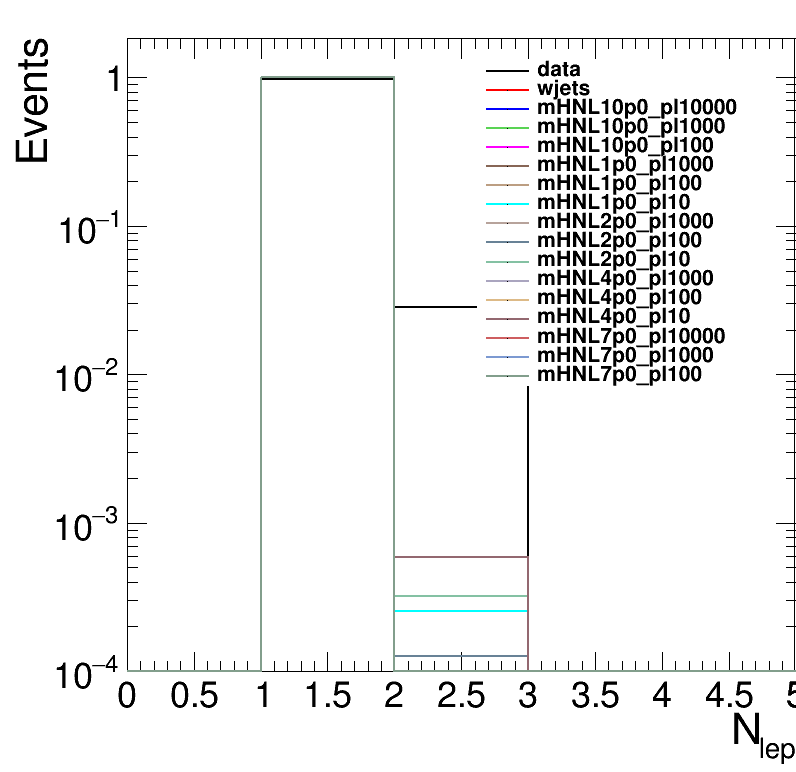

In [196]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

var = [met, lepPt, lepEta, lepPhi, nLeptons, nClusters]
varName = ['met', 'lepPt', 'lepEta', 'lepPhi', 'nLeptons', 'nClusters']
xaxis = ['met[GeV]', 'lep p_{T} [GeV]', 'lep #eta [GeV]', 'lep #phi', 'N_{lep}', 'N_{clusters}']
bins = [[50,0,300],[50,0,500],[50,-2.5,2.5],[50,-5,5],[5,0,5],[5,0,5]]

drawShape = True
for i, v in enumerate(var):
    if not i == 4:continue
    leg = rt.TLegend(0.6,0.5,0.90,0.92)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)
    rt.gStyle.SetOptFit(1011)
    h = {}
    
    for j, k in enumerate(tree.keys()):
#         if not 'wjets' in k:continue
        h[k] = create_TH1D( v[k], axis_title=[xaxis[i], 'Events'], name='h', binning=bins[i],weights=weight_evt[k])
        print(k, '\t', np.sum(weight_evt[k][met[k]>200])/np.sum(weight_evt[k]))
        h[k].SetLineColor(std_color_list[j])
        if drawShape and h[k].Integral()>0: h[k].Scale(1./h[k].Integral())
        else: 
            if 'data' in k:h[k].Scale(137000/0.939)
            else:h[k].Scale(137000)
#         print(k, h[k].Integral())
#         h[k].SetMaximum(1200000)
        h[k].SetMinimum(0.0001)
#         h[k].SetMaximum(1.)

        if 'HNL' in k:leg.AddEntry(h[k],k[17:])
        else:leg.AddEntry(h[k],k)
        h[k].Draw('same hist')
    
    leg.Draw()
    c.SetRightMargin(0)
    c.SetLogy()
#     if len(jetpt)>0:
#         c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'_jetpt.png')
#         c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'_jetpt.C')
#     else:
#         c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'.png')
#         c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'.C')        
    c.Draw()



# cluster-level plots

HNL_electronType_mHNL10p0_pl100 0.3333333333333333
0.30871795743235064
12
HNL_electronType_mHNL4p0_pl100 0.8903654485049833
0.06344329985225455
301
HNL_electronType_mHNL7p0_pl100 0.6222222222222222
0.160170090334176
45


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/HNL/sig_bkg/dphiLep_cluster_shape.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/HNL/sig_bkg/dphiLep_cluster_shape.C has been generated
Info in <TCanvas::Print>: pdf file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/HNL/sig_bkg/dphiLep_cluster_shape.pdf has been created


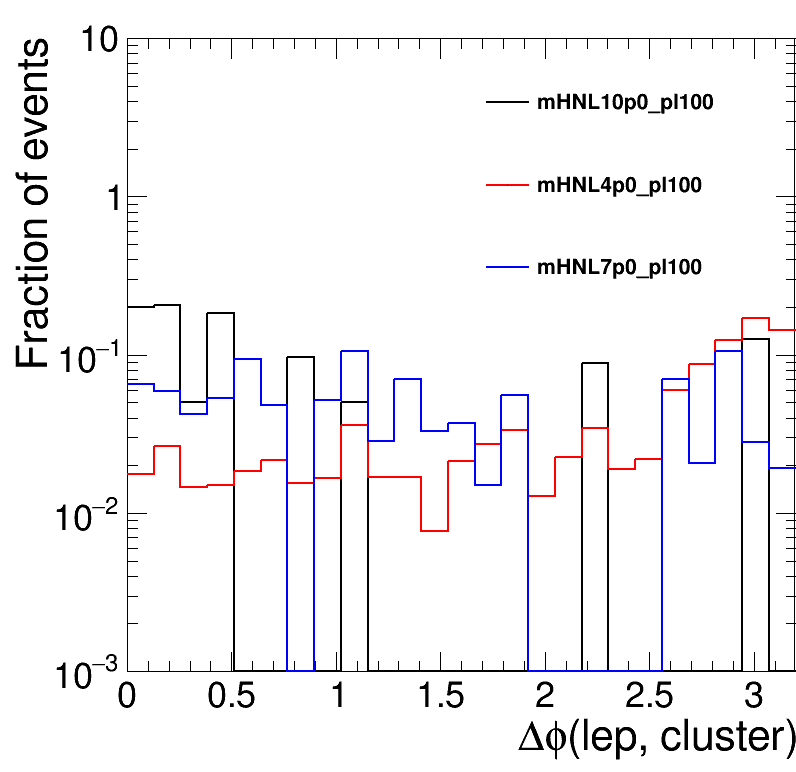

In [555]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

drawShape = 1

var = [dtRechitClusterNStation10, dtRechitClusterEta, dtRechitClusterPhi, dtRechitClusterAvgStation10, dtRechitClusterMaxStation, \
       dtRechitClusterMuonVetoPt, dtRechitClusterGenMuonVetoPt, dtRechitClusterJetVetoPt, dtRechitCluster_match_RB1_dPhi0p5, dtRechitCluster_match_MB1hits_0p5, dtRechitCluster_match_RPChits_dPhi0p5,\
      dphiMet_cluster, dphiLep_cluster, dphiLep_llp, gLLP_lepdPhi, dtRechitCluster_match_RPCBx_dPhi0p5, dtClusterSize]
varName = ['dtRechitClusterNStation10', 'dtRechitClusterEta', 'dtRechitClusterPhi', 'dtRechitClusterAvgStation10', 'dtRechitClusterMaxStation', \
       'dtRechitClusterMuonVetoPt', 'dtRechitClusterGenMuonVetoPt', 'dtRechitClusterJetVetoPt', 'dtRechitCluster_match_RB1_dPhi0p5', 'dtRechitCluster_match_MB1hits_0p5', 'dtRechitCluster_match_RPChits_dPhi0p5',\
      'dphiMet_cluster', 'dphiLep_cluster', 'dphiLep_llp','gLLP_lepdPhi', 'dtRechitCluster_match_RPCBx_dPhi0p5', 'dtClusterSize']
xaxis = ['N_{station}','cluster #eta', 'cluster #phi', 'avg station', 'max station',\
         'muon veto p_{T} [GeV]', 'gen muon veto p_{T} [GeV]', 'jet veto p_{T} [GeV]', 'N_{matched RB1 hits}', 'N_{matched MB1 hits}', 'N_{matched RPC hits}', \
         '#Delta#phi(cluster, met)', '#Delta#phi(lep, cluster)', '#Delta#phi(lep, LLP)','#Delta#phi(lep, LLP)','cluster Bx', 'N_{rechits}']
bins = [[5,0,5],[25,-1.2,1.2],[50,-4,4],[25,1,4],[5,0,5],\
       [30,0,300],[30,0,50], [30,0,300],[30,0,30],[50,0,100],[50,0,50],\
       [50,-3.2,3.2],[25,0,3.2],[25,0, 3.2],[25,0,3.2],[20,-10,10],[40,0,500]]

option = 'sig_bkg_jetveto20_mb1_rpc'
option = 'sig_bkg'
# option = 'mb1_veto'
for i, v in enumerate(var):
    if not i == 12:continue
    leg = rt.TLegend(0.6,0.6,0.90,0.92)

    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)
    rt.gStyle.SetOptFit(1011)

    h = {}
    index = 0
    for j, k in enumerate(tree.keys()):
        if 'mHNL1p0' in k:continue
        if 'mHNL2p0' in k:continue
        if i == 14 and (k == 'data' or k == 'wjets'):continue
        if k[-2:] == '10' or '000' in k:continue 
        if k == 'data' or k == 'wjets':continue
        if option == 'sig_bkg':
            cond = dtRechitClusterJetVetoPt[k]<20000000
        elif option == 'sig_bkg_jetveto20_mb1_rpc':
            cond = dtRechitClusterJetVetoPt[k]<20
            cond = np.logical_and(cond, dtRechitCluster_match_MB1hits_0p5[k]<=1)
#             cond = np.logical_and(cond, dtRechitClusterMuonVetoPt[k]<=1)
            cond = np.logical_and(cond, dtRechitCluster_match_RPChits_dPhi0p5[k]>0)
        else:
            print("here")
            cond = dtRechitCluster_match_MB1hits_0p5[k]<=1
#             cond = np.logical_and(cond, dtRechitClusterMuonVetoPt[k]<10)
        if k == 'data': cond = np.logical_and(cond, dtClusterSize[k]<100)
            
#         print(k, np.count_nonzero(np.logical_and(cond, dtRechitClusterJetVetoPt[k]<20))/np.count_nonzero(cond)) 
        if varName[i] == 'gLLP_lepdPhi':
            if drawShape: h[k] = create_TH1D( np.abs(v[k][sel_ev[k]][cond]), axis_title=[xaxis[i], 'Fraction of events'], name='h', binning=bins[i], weights=weight[k][cond])
            else: h[k] = create_TH1D( v[k][sel_ev[k]][cond], axis_title=[xaxis[i], 'Events'], name='h', binning=bins[i], weights=weight[k][cond])
        else:
            if drawShape: h[k] = create_TH1D( np.abs(v[k][cond]), axis_title=[xaxis[i], 'Fraction of events'], name='h', binning=bins[i], weights=weight[k][cond])
            else: h[k] = create_TH1D( v[k][cond], axis_title=[xaxis[i], 'Events'], name='h', binning=bins[i], weights=weight[k][cond])
        h[k].SetLineColor(std_color_list[index])
#         print(k, h[k].Integral()*137000, np.sum(weight[k][np.l])/np.sum(weight[k][cond]))

        if drawShape and h[k].Integral()>0:
            h[k].Scale(1./h[k].Integral())
            if varName[i] == 'dtRechitCluster_match_RPCBx_dPhi0p5': h[k].SetMaximum(100)
            else: h[k].SetMaximum(10)
            h[k].SetMinimum(1e-3)
        else: 
            if 'data' in k:h[k].Scale(137000/939)
            else:h[k].Scale(137000)
        if h[k].Integral()>0:
            if 'HNL' in k:leg.AddEntry(h[k],k[17:])
            else:leg.AddEntry(h[k],k)
            h[k].Draw('same hist')
            index += 1
        cut =1
        if i == 14:
            print(k, np.count_nonzero(np.abs(v[k][sel_ev[k]][cond])>cut)/np.count_nonzero(cond))
            print(np.sum(weight[k][cond]**2)**0.5/np.sum(weight[k][cond]))
            print(len(weight[k][cond]))
        else:
            print(k, np.count_nonzero(np.abs(v[k][cond])>cut)/np.count_nonzero(cond))
#             print(k, np.count_nonzero(v[k][cond]<0)/np.count_nonzero(cond))
            print(np.sum(weight[k][cond]**2)**0.5/np.sum(weight[k][cond]))
            print(len(weight[k][cond]))
    leg.Draw()
    c.SetRightMargin(0)
    c.SetLogy()
    plot_dir='/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/HNL/'+option+'/'
    if drawShape:
        c.SaveAs(plot_dir+varName[i]+'_shape.png')
        c.SaveAs(plot_dir+varName[i]+'_shape.C')
        c.SaveAs(plot_dir+varName[i]+'_shape.pdf')
    else:
        c.SaveAs(plot_dir+varName[i]+'.png')
        c.SaveAs(plot_dir+varName[i]+'.C')
        c.SaveAs(plot_dir+varName[i]+'.pdf')
    c.Draw()



In [356]:
# wjets
k = 'wjets'

cond = dtRechitClusterJetVetoPt[k]<20
# cond = dtRechitClusterJetVetoPt[k]<20
# cond = np.logical_and(dtClusterSize[k]>100, cond)
# cond = np.logical_and(dtRechitCluster_match_MB1hits_0p5[k]<10, cond)
# cond = np.logical_and(cond, dtRechitClusterNStation10[k]==3)
cond = np.logical_and(cond, np.logical_and(dtRechitCluster_match_MB1hits_0p5[k]<20, dtRechitCluster_match_MB1hits_0p5[k]>10))
# print(dtRechitClusterNStation10[k][cond])
# print(dtRechitCluster_match_MB1hits_0p5[k][cond])
print(dtRechitClusterMaxStation[k][cond])
print(dtRechitCluster_match_RB1_dPhi0p5[k][cond])
print(dtRechitCluster_match_RPChits_dPhi0p5[k][cond])


[3 2 1 2 3 4 2 3 2 3 1 4 2 2 3 2 2 1 2 1 3 3 2 2 1 2 3 1 2 2 3 3 2 2 3 1 2
 1 3 3 4 2 2 1 4 2 2 2 3 2 2 4 1 2 1 4 4 2 2 3 3 2 2 2 3 3 2 2 2 3 3 3 3 2
 3 2 1 3 2 4 3 2 3 1 2 2 4 2 3 2 2 3 2 2 2 3 2 2 2 3 2 4 2 3 2 3 3 2 3 3 3
 4 2 3 2 4 2 2 2 4 1 3 2 3 2 2 3 2 2 2 2 1 2 2 3 3 2 2 1 2 3 2 4 3 3 2 3 2
 2 2 2 3 3 2 2 1 2 4 1 2 3 3 2 1 2 1 4 1 1 2 3 2 1 2 2 3 2 2 2 4 2 2 3 1 4
 1 1 3 1 2 2 3 2 3 2 2 3 2 3 1 3 2 4 3 2 2 2 2 2 3 3 2 3 2 2 2 1 3 2 2 2 1
 1 3 3 2 1 3 2 2 2 4 2 2 2 4 1 2 4 2 2 3 3]
[2 2 2 2 3 1 2 0 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2
 1 1 2 2 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 1 2 2 2 2 2 2 4 2 2 2 4 0 0 1 2 1 2 2 2 0 1 2 2 2 1 2 1 2 2 2 2 2 2
 4 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 0 2 2 1 2 2
 2 2 1 2 2 2 2 2 2 0 1 2 2 2 2 2 2 4 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 2 1 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 1 2 2 0 2 2 2 1 2 1 2 1 3
 2 2 2 2 2 1 2 2 2 2 2 2 3 2 4 2 2 2 3 2 2]
[ 6  6  5  6

In [340]:
np.count_nonzero(dtClusterSize[k]>100)

67

# gen-level plots

HNL_electronType_mHNL1p0_pl1000 0.9015288001235394
HNL_electronType_mHNL1p0_pl100 0.9252034332850295
HNL_electronType_mHNL2p0_pl1000 0.9125060513151525
HNL_electronType_mHNL2p0_pl100 0.9081332391713748
HNL_electronType_mHNL4p0_pl1000 0.9205660751462278
HNL_electronType_mHNL4p0_pl100 0.8213274614658698


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


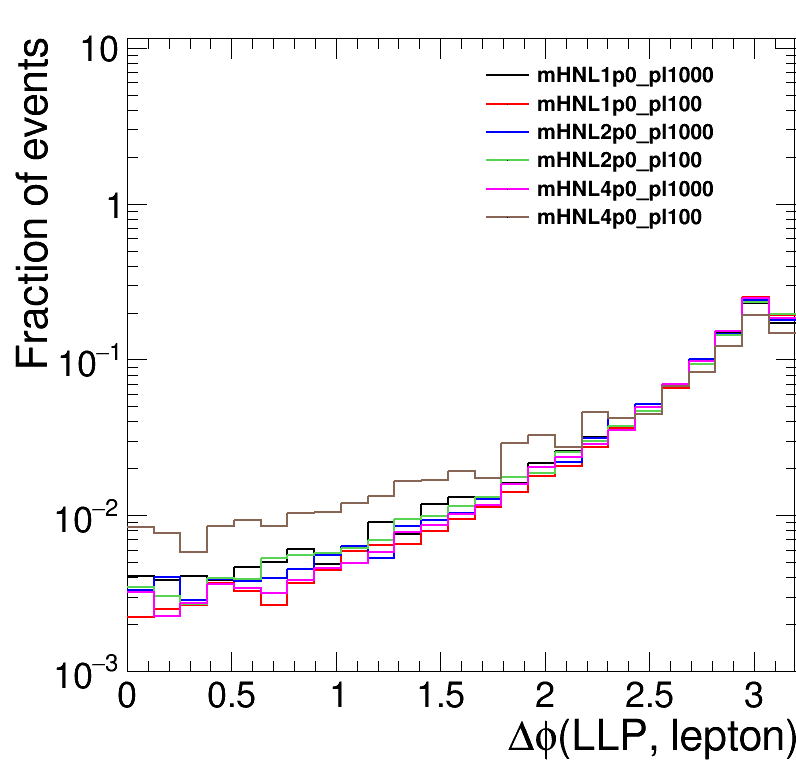

In [524]:

import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

drawShape = 1
require_acceptance = 1
var = [gLLP_pt, gLLP_eta, gLLP_e, gLepPt, gLepEta, gLLP_dt, gLLP_lepdPhi]
varName = ['gLLP_pt', 'gLLP_eta', 'gLLP_e', 'gLepPt', 'gLepEta', 'gLLP_dt', 'gLLP_lepdPhi']


xaxis = ['LLP p_{T} [GeV]', 'LLP #eta', 'LLP energy [GeV]', 'gen Lepton p_{T} [GeV]','gen Lepton #eta','gLLP dt', '#Delta#phi(LLP, lepton)']
bins = [[50,0,500],[30,-5,5],[50,0,500], [50,0,500], [30,-5,5],[2,0,2], [25,0,3.2]]

for i, v in enumerate(var):
    if not i == 6:continue
    leg = rt.TLegend(0.6,0.7,0.90,0.92)

    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)
    rt.gStyle.SetOptFit(1011)

    h = {}
    index = 0
    for j, k in enumerate(tree.keys()):
        if 'mHNL10p0' in k:continue
        if 'mHNL7p0' in k:continue
        if not 'HNL' in k:continue
        if k[-2:] == '10':continue 
        cond = gLLP_dt[k]>=0
        if require_acceptance: cond = gLLP_dt[k] == 1
#             cond = np.logical_and(cond, dtRechitCluster_match_RPChits_dPhi0p5[k]>0)
        if drawShape: h[k] = create_TH1D( np.abs(v[k][cond]), axis_title=[xaxis[i], 'Fraction of events'], name='h', binning=bins[i], weights=weight_all[k][cond])
        else: h[k] = create_TH1D( v[k][cond], axis_title=[xaxis[i], 'Events'], name='h', binning=bins[i], weights=weight_all[k][cond])
        h[k].SetLineColor(std_color_list[index])
#         print(k, h[k].Integral()*137000, np.sum(weight[k])*137000, len(v[k]))

        if drawShape and h[k].Integral()>0:
            h[k].Scale(1./h[k].Integral())
            if not('eta' in varName[i] or 'Eta' in varName[i]):h[k].SetMaximum(h[k].GetMaximum()*50)
            else:h[k].SetMaximum(h[k].GetMaximum()*20)
            h[k].SetMinimum(1e-3)
        else: 
            if 'data' in k:h[k].Scale(137000/939)
            else:h[k].Scale(137000)
        if h[k].Integral()>0:
            if 'HNL' in k:leg.AddEntry(h[k],k[17:])
            else:leg.AddEntry(h[k],k)
            h[k].Draw('same hist')
            index += 1
        print(k, np.count_nonzero(np.abs(v[k][cond])>2)/np.count_nonzero(cond))

    leg.Draw()
    c.SetRightMargin(0)
    if not('eta' in varName[i] or 'Eta' in varName[i]):c.SetLogy()
    if require_acceptance:plot_dir='/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/HNL/gen_level_plots_accep/'
    else:plot_dir='/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/HNL/gen_level_plots/'
        
#     if drawShape:
#         c.SaveAs(plot_dir+varName[i]+'_shape.png')
#         c.SaveAs(plot_dir+varName[i]+'_shape.C')
#         c.SaveAs(plot_dir+varName[i]+'_shape.pdf')
#     else:
#         c.SaveAs(plot_dir+varName[i]+'.png')
#         c.SaveAs(plot_dir+varName[i]+'.C')
#         c.SaveAs(plot_dir+varName[i]+'.pdf')
    c.Draw()


    


# roc curve

data [0.09798617]
wjets [0.17455668]
HNL_electronType_mHNL10p0_pl10000 [0.63333289]
HNL_electronType_mHNL10p0_pl1000 [0.64536541]
HNL_electronType_mHNL10p0_pl100 [0.64386367]
HNL_electronType_mHNL1p0_pl1000 [0.60349715]
HNL_electronType_mHNL1p0_pl100 [0.62364357]
HNL_electronType_mHNL1p0_pl10 [0.92860095]
HNL_electronType_mHNL2p0_pl1000 [0.59839403]
HNL_electronType_mHNL2p0_pl100 [0.62326005]
HNL_electronType_mHNL2p0_pl10 [nan]
HNL_electronType_mHNL4p0_pl1000 [0.61513039]
HNL_electronType_mHNL4p0_pl100 [0.67716176]
HNL_electronType_mHNL4p0_pl10 [nan]
HNL_electronType_mHNL7p0_pl10000 [0.64131977]
HNL_electronType_mHNL7p0_pl1000 [0.65716755]
HNL_electronType_mHNL7p0_pl100 [0.7847462]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/HNL/sig_bkg//roc_curve_dtClusterSize.png has been created
Info in <TCanvas::Print>: pdf file /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/HNL/sig_bkg//roc_curve_dtClusterSize.pdf has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/HNL/sig_bkg//roc_curve_dtClusterSize.C has been generated


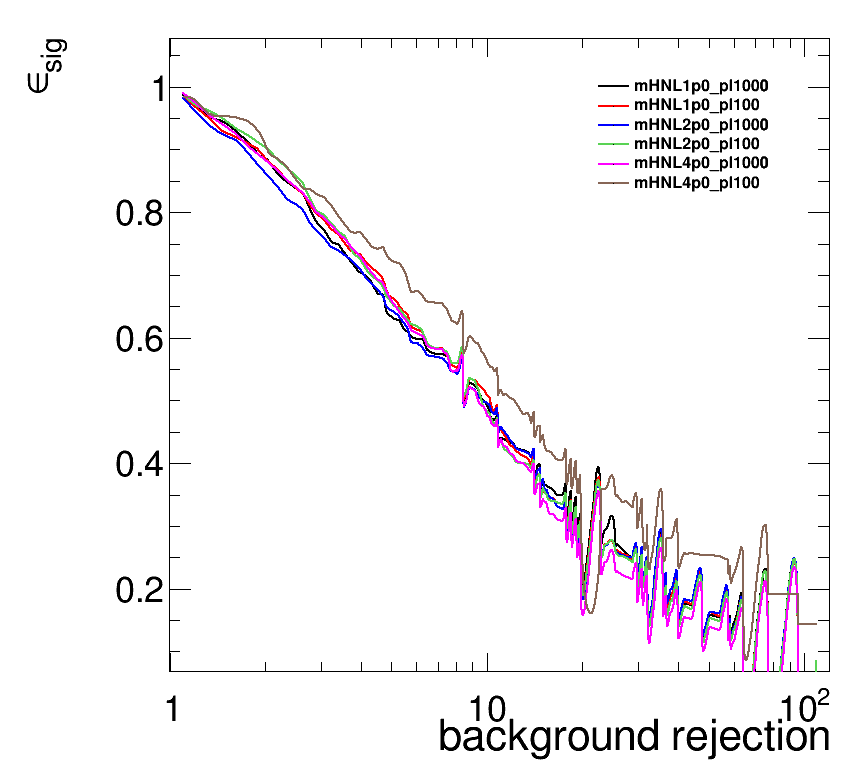

In [499]:
#ROC curve

var = [dphiLep_cluster, dphiMet_cluster, dtClusterSize]
name = ['dphiLep_cluster', 'dphiMet_cluster', 'dtClusterSize']
label = ['dphiLep_cluster', 'dphiMet_cluster', 'dtClusterSize']
bkg_key ='wjets'
option = 'sig_bkg'
# option = 'sig_bkg_jetveto20_mb1_rpc'

for i, v in enumerate(var):
    if not i == 2:continue
    if i == 2: thre = np.array(np.arange(50,200,1))
    else: thre = np.array(np.arange(0,3.2,0.05))

    eff = {}
    gr = {}
    c = rt.TCanvas('c','c', 850, 800)
    leg = rt.TLegend(0.7,0.75,0.9,0.90)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)


    for k in tree.keys():
        eff[k] = []
        if option == 'sig_bkg':
            cond = dtRechitClusterJetVetoPt[k]<20000000
        else:
            cond = dtRechitClusterJetVetoPt[k]<20
            cond = np.logical_and(cond, dtRechitCluster_match_MB1hits_0p5[k]<=1)
            cond = np.logical_and(cond, dtRechitCluster_match_RPChits_dPhi0p5[k]>0)
        if k == 'data': cond = np.logical_and(cond, dtClusterSize[k]<100)
            
        for th in thre:
            if name[i] == 'dphiLep_cluster':eff[k].append(1.0*np.sum(weight[k][np.logical_and(cond, np.abs(v[k])>th)])/np.sum(weight[k][cond]))
            elif name[i] == 'dphiMet_cluster':eff[k].append(1.0*np.sum(weight[k][np.logical_and(cond, np.abs(v[k])<th)])/np.sum(weight[k][cond]))
            elif name[i] == 'dtClusterSize':eff[k].append(1.0*np.sum(weight[k][np.logical_and(cond, np.abs(v[k])>th)])/np.sum(weight[k][cond]))
        eff[k] = np.array(eff[k])
        print(k,eff[k][thre==80])
#     Plotting ROC curve
    for k in tree.keys(): 
        if bkg_key == k:continue
        eff[k] = eff[k][eff[bkg_key] > 0]
    eff[bkg_key] = eff[bkg_key][eff[bkg_key] > 0]
    j = 0
    for k in tree.keys():
        if 'mHNL10p0' in k:continue
        if 'mHNL7p0' in k:continue
        if not 'HNL' in k:continue
        if k[-2:] == '10':continue 
        gr[k] = create_TGraph(np.reciprocal(eff[bkg_key]),eff[k],axis_title = ['background rejection','#epsilon_{sig}'])
        gr[k].SetLineColor(std_color_list[j])
        gr[k].SetLineWidth(2)
        gr[k].GetYaxis().SetTitleOffset(1.5)

        leg.AddEntry(gr[k],k[17:])
        gr[k].Draw('ac' if j==0 else 'c')
        leg.Draw()
        j+=1
#         print(k, thre[np.argmin(np.abs(eff[k]-0.8))], eff[k][np.argmin(np.abs(eff[k]-0.9))])
        
    c.SetLeftMargin(0.2)
    c.SetLogx()
    c.Draw()

    plot_dir='/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/HNL/'+option+'/'

    c.SaveAs(plot_dir+'/roc_curve_'+name[i]+'.png')
    c.SaveAs(plot_dir+'/roc_curve_'+name[i]+'.pdf')
    c.SaveAs(plot_dir+'/roc_curve_'+name[i]+'.C')


In [419]:
weight.keys()

dict_keys(['data', 'wjets', 'HNL_electronType_mHNL10p0_pl10000', 'HNL_electronType_mHNL10p0_pl1000', 'HNL_electronType_mHNL10p0_pl100', 'HNL_electronType_mHNL1p0_pl1000', 'HNL_electronType_mHNL1p0_pl100', 'HNL_electronType_mHNL1p0_pl10', 'HNL_electronType_mHNL2p0_pl1000', 'HNL_electronType_mHNL2p0_pl100', 'HNL_electronType_mHNL2p0_pl10', 'HNL_electronType_mHNL4p0_pl1000', 'HNL_electronType_mHNL4p0_pl100', 'HNL_electronType_mHNL4p0_pl10', 'HNL_electronType_mHNL7p0_pl10000', 'HNL_electronType_mHNL7p0_pl1000', 'HNL_electronType_mHNL7p0_pl100'])